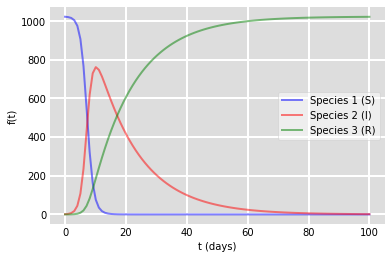

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial number of infected and recovered individuals, I0 and R0.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
n = 2 ** 10
y01, y02 = n - 1, 1
# Everyone else, S0, is susceptible to infection initially.
y03 = 0
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

def F(i, N):
    d = 0
    beta, gamma = 0.001, 1./14 
    for j in range(0, 3):
        F = [[0, -beta * N[i] * N[j], 0], [beta * N[i] * N[j], -1 * gamma * N[i], 0], [0, gamma * N[j], 0]]
        d += F[i][j]
    return d
# The SIR model differential equations.
def deriv(y, t):
    N = y
    d1dt = F(0, N)
    d2dt = F(1, N)
    d3dt = F(2, N)
    return d1dt, d2dt, d3dt

# Initial conditions vector
y0 = y01, y02, y03
# Integrate the SIR equations over the time grid, t.

ret = odeint(deriv, y0, t)
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Species 1 (S)')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Species 2 (I)')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Species 3 (R)')
ax.set_xlabel('t (days)')
ax.set_ylabel('f(t)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()